<a href="https://colab.research.google.com/github/Bhakthipoorna/machine-learning/blob/main/02_Keras_CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Multiple Classes



-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt

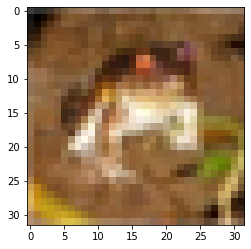

In [ ]:
# FROG
plt.imshow(x_train[0])

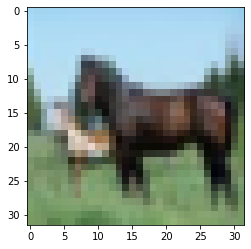

In [ ]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
#x_train.max()   #0- 255
x_train.min()

0

In [ ]:
x_train = x_train/225

In [ ]:
x_test = x_test/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_categorical_train = to_categorical(y_train,10)

In [ ]:
y_categorical_train.shape

(50000, 10)

In [ ]:
y_categorical_train[12]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [ ]:
model.fit(x_train,y_categorical_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 4ms/step - loss: 1.7384 - accuracy: 0.3725
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1967 - accuracy: 0.5789
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0181 - accuracy: 0.6481
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8945 - accuracy: 0.6899
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8046 - accuracy: 0.7247
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7382 - accuracy: 0.7458
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6919 - accuracy: 0.7670
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6307 - accuracy: 0.7876
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6017 - accuracy: 0.7942
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.56

In [ ]:
# Careful, don't overwrite our file!
model.save('cifar_10epochs.h5')

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2706 - accuracy: 0.6470


[1.2706489562988281, 0.6470000147819519]

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67      1000
           1       0.84      0.75      0.79      1000
           2       0.38      0.72      0.50      1000
           3       0.53      0.40      0.46      1000
           4       0.50      0.76      0.60      1000
           5       0.66      0.50      0.57      1000
           6       0.76      0.75      0.75      1000
           7       0.83      0.58      0.68      1000
           8       0.77      0.79      0.78      1000
           9       0.89      0.62      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.69      0.65      0.65     10000
weighted avg       0.69      0.65      0.65     10000



## Optional: Large Model

In [ ]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_categorical_train,verbose=1,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8031 - accuracy: 0.3424
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1899 - accuracy: 0.5830
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9947 - accuracy: 0.6549
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9190 - accuracy: 0.6868
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8841 - accuracy: 0.7017
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8594 - accuracy: 0.7097
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8452 - accuracy: 0.7165
Epoch 8/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8326 - accuracy: 0.7227
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8273 - accuracy: 0.7317
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.811

In [ ]:
cifar10

AttributeError: ignored

In [ ]:
model.evaluate(x_test,y_cat_test)

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
model.save('larger_CIFAR10_model.h5')

___